# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
            
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tokar
Processing Record 2 of Set 1 | la dorada
Processing Record 3 of Set 1 | longyearbyen
Processing Record 4 of Set 1 | palo santo
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | hawaiian paradise park
Processing Record 7 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 8 of Set 1 | isafjordur
Processing Record 9 of Set 1 | masterton
Processing Record 10 of Set 1 | east london
Processing Record 11 of Set 1 | kalifornsky
Processing Record 12 of Set 1 | antofagasta
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | georgetown
Processing Record 15 of Set 1 | west island
Processing Record 16 of Set 1 | port mathurin
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | fort bragg
Processing Record 19 of Set 1 | rongelap
Processing Record 20 of Set 1 | wailua homesteads
Processing Record 21 of Set 1 | ke

City not found. Skipping...
Processing Record 38 of Set 4 | majene
Processing Record 39 of Set 4 | saint-philippe
Processing Record 40 of Set 4 | lebu
Processing Record 41 of Set 4 | eskisehir
Processing Record 42 of Set 4 | beykonak
Processing Record 43 of Set 4 | al ghayzah
Processing Record 44 of Set 4 | tralee
Processing Record 45 of Set 4 | floro
Processing Record 46 of Set 4 | soc trang
Processing Record 47 of Set 4 | anjozorobe
Processing Record 48 of Set 4 | nizhneudinsk
Processing Record 49 of Set 4 | mili
Processing Record 0 of Set 5 | jinghong
Processing Record 1 of Set 5 | tucupita
Processing Record 2 of Set 5 | bulayevo
Processing Record 3 of Set 5 | laguna
Processing Record 4 of Set 5 | bethanie
Processing Record 5 of Set 5 | al burayqah
Processing Record 6 of Set 5 | calp
Processing Record 7 of Set 5 | ergani
Processing Record 8 of Set 5 | manismata
Processing Record 9 of Set 5 | codrington
Processing Record 10 of Set 5 | caibarien
Processing Record 11 of Set 5 | brookin

Processing Record 35 of Set 8 | keflavik
Processing Record 36 of Set 8 | singkil
Processing Record 37 of Set 8 | waingapu
Processing Record 38 of Set 8 | port moresby
Processing Record 39 of Set 8 | preobrazheniye
Processing Record 40 of Set 8 | ta`u
Processing Record 41 of Set 8 | samho-rodongjagu
Processing Record 42 of Set 8 | sesheke
Processing Record 43 of Set 8 | canutama
Processing Record 44 of Set 8 | nakhon si thammarat
Processing Record 45 of Set 8 | ouani
Processing Record 46 of Set 8 | thurso
Processing Record 47 of Set 8 | mount pearl
Processing Record 48 of Set 8 | noosa heads
Processing Record 49 of Set 8 | carnarvon
Processing Record 0 of Set 9 | qom
Processing Record 1 of Set 9 | hastings
Processing Record 2 of Set 9 | altay
Processing Record 3 of Set 9 | hayma'
City not found. Skipping...
Processing Record 4 of Set 9 | qaisumah
Processing Record 5 of Set 9 | namtsy
Processing Record 6 of Set 9 | takamaka
City not found. Skipping...
Processing Record 7 of Set 9 | homer

Processing Record 24 of Set 12 | zheleznogorsk-ilimskiy
Processing Record 25 of Set 12 | hilo
Processing Record 26 of Set 12 | belel
Processing Record 27 of Set 12 | niquero
Processing Record 28 of Set 12 | oak ridge
Processing Record 29 of Set 12 | ippy
Processing Record 30 of Set 12 | dolbeau-mistassini
Processing Record 31 of Set 12 | grootfontein
Processing Record 32 of Set 12 | labrador city
Processing Record 33 of Set 12 | bridgewater
Processing Record 34 of Set 12 | port said
Processing Record 35 of Set 12 | colchani
Processing Record 36 of Set 12 | kodinsk
Processing Record 37 of Set 12 | north bend
Processing Record 38 of Set 12 | xinyuan
Processing Record 39 of Set 12 | kidal
Processing Record 40 of Set 12 | panorama
Processing Record 41 of Set 12 | puerto colombia
Processing Record 42 of Set 12 | tianpeng
Processing Record 43 of Set 12 | stephenville
Processing Record 44 of Set 12 | bangui
Processing Record 45 of Set 12 | ladario
Processing Record 46 of Set 12 | cold springs

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tokar,18.4254,37.7290,27.14,70,8,5.24,SD,1701656686
1,la dorada,5.4478,-74.6631,24.79,88,47,0.41,CO,1701656686
2,longyearbyen,78.2186,15.6401,-9.09,67,40,7.20,SJ,1701656686
3,palo santo,-25.5633,-59.3378,21.59,97,100,2.99,AR,1701656686
4,ribeira grande,38.5167,-28.7000,15.45,52,35,3.04,PT,1701656686


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tokar,18.4254,37.7290,27.14,70,8,5.24,SD,1701656686
1,la dorada,5.4478,-74.6631,24.79,88,47,0.41,CO,1701656686
2,longyearbyen,78.2186,15.6401,-9.09,67,40,7.20,SJ,1701656686
3,palo santo,-25.5633,-59.3378,21.59,97,100,2.99,AR,1701656686
4,ribeira grande,38.5167,-28.7000,15.45,52,35,3.04,PT,1701656686


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

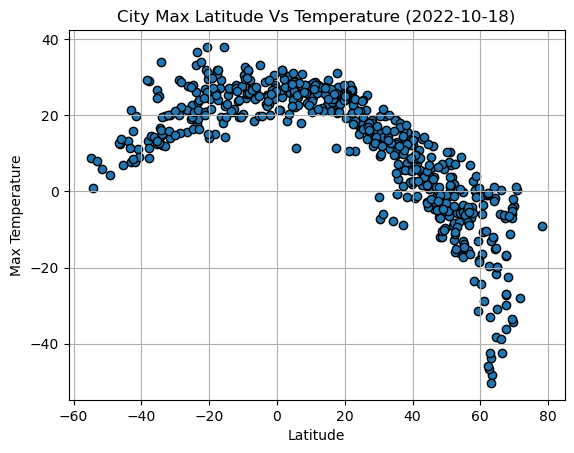

In [15]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values,edgecolors='black')

# Incorporate the other graph properties
plt.title("City Max Latitude Vs Temperature (2022-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

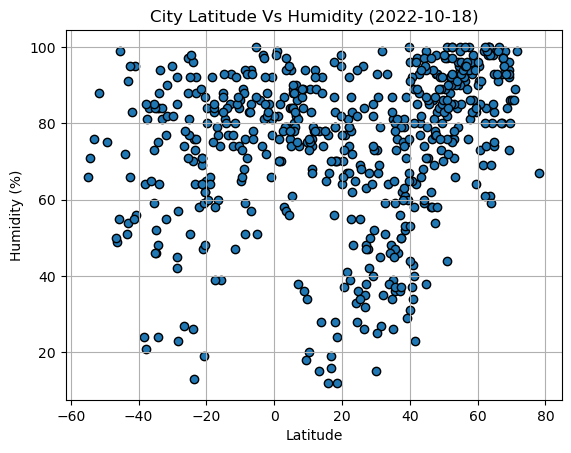

In [16]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values,edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude Vs Humidity (2022-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

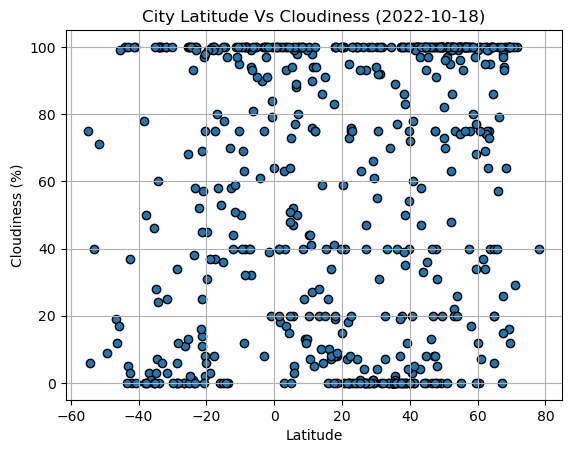

In [17]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values,edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude Vs Cloudiness (2022-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

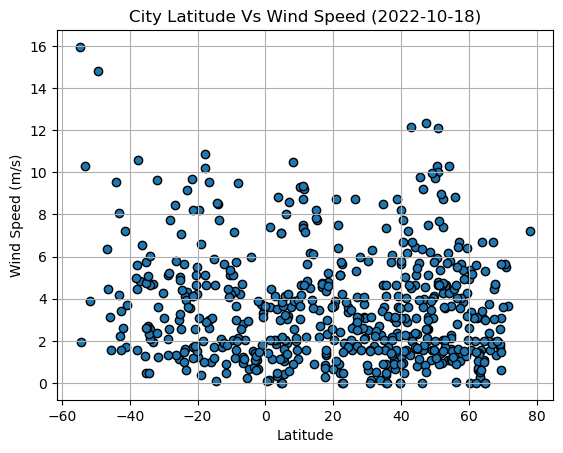

In [18]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values,edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude Vs Wind Speed (2022-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tokar,18.4254,37.7290,27.14,70,8,5.24,SD,1701656686
1,la dorada,5.4478,-74.6631,24.79,88,47,0.41,CO,1701656686
2,longyearbyen,78.2186,15.6401,-9.09,67,40,7.20,SJ,1701656686
4,ribeira grande,38.5167,-28.7000,15.45,52,35,3.04,PT,1701656686
5,hawaiian paradise park,19.5933,-154.9731,23.82,95,100,3.60,US,1701656686


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,palo santo,-25.5633,-59.3378,21.59,97,100,2.99,AR,1701656686
7,masterton,-40.9597,175.6575,11.20,95,100,1.71,NZ,1701656687
8,east london,-33.0153,27.9116,19.72,81,100,1.93,ZA,1701656687
10,antofagasta,-23.6500,-70.4000,17.60,76,38,1.60,CL,1701656392
13,west island,-12.1568,96.8225,27.99,74,40,5.66,CC,1701656687


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7515132645507356


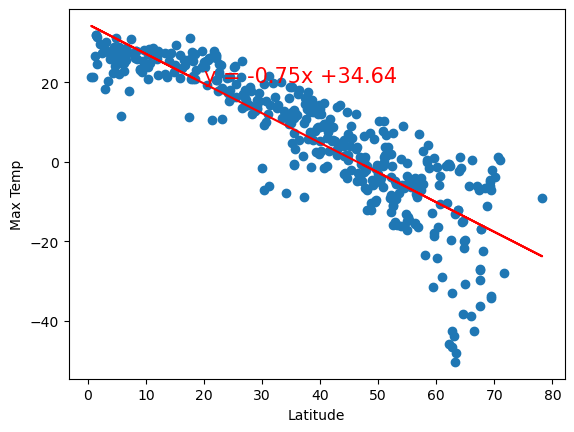

In [22]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(20,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue**2}")
plt.show()


The r-value is: 0.41362717167380936


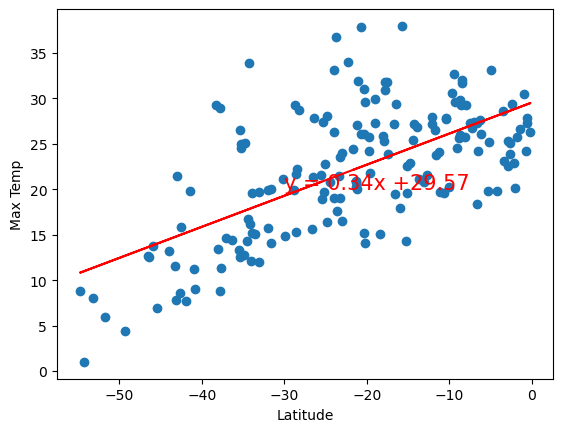

In [24]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** 

The closer the latitude gets to zero the warmer the max temperture 
there is a postive correlation between max temperture and the latitude 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.10081276185154771


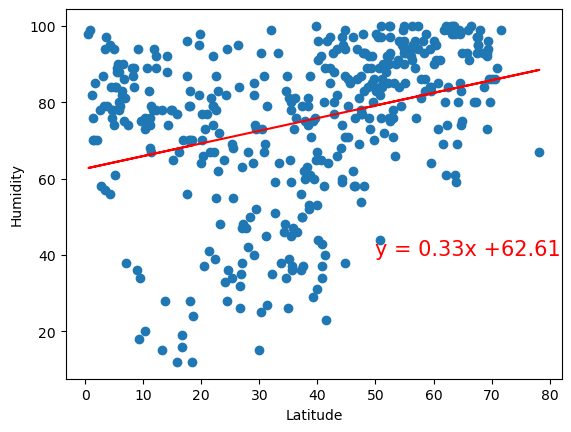

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(50,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.05635880390962532


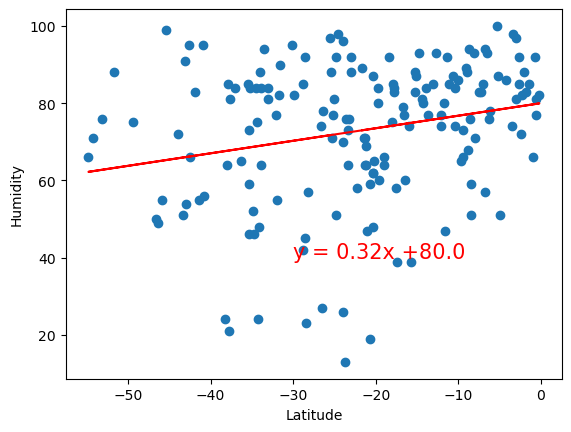

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** 
There is a week correlation between humididity and maxium tempertature as the r value is low 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.04656637068100119


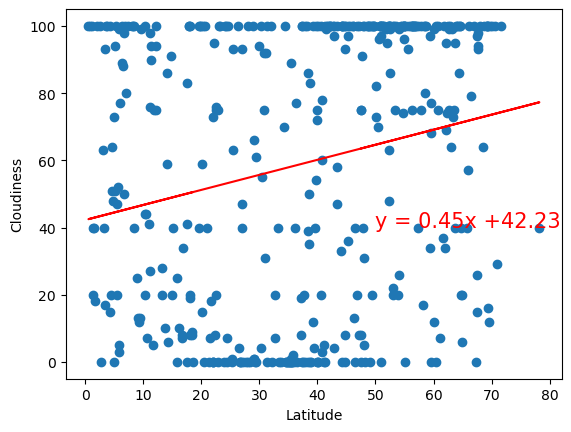

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(50,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.11591966591956633


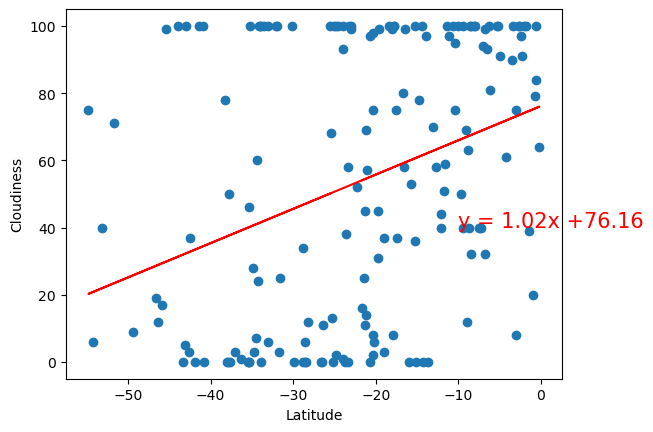

In [29]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-10,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** Weak correlation between cloudiness and latitiude due to low r value


### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.00019144015780676827


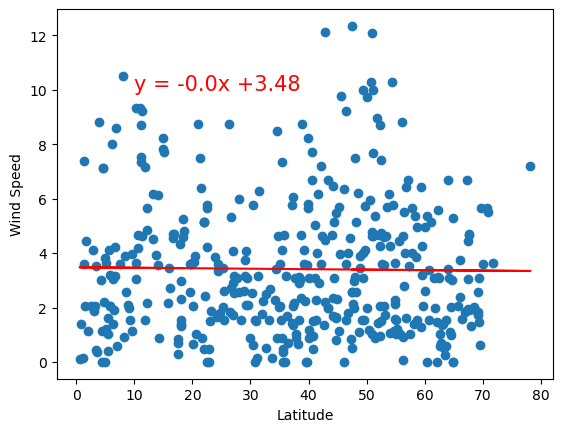

In [30]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.10718567798737559


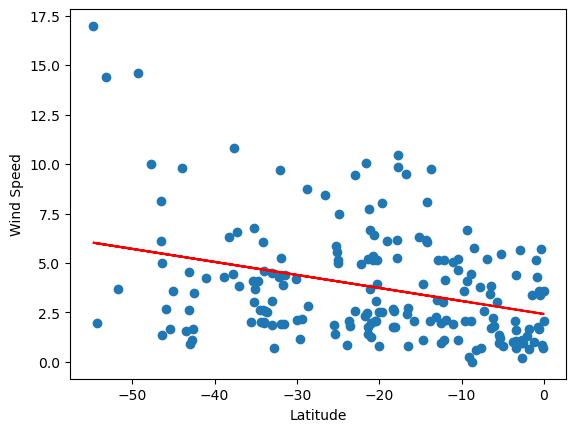

In [28]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-10,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** Weak relationship between latitude and wind speed from